First I import libraries and load the csv file.

In [1]:
#import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
import numpy as np
from matplotlib import pyplot as plt

#load weather.csv using pandas
import os

path=os.path.join(os.path.dirname(os.getcwd()), 'data', 'weather.csv')
data=pd.read_csv(path)

Next I set up the model and print its accuracy.

In [2]:
#setting up training and tests
X=df[['precipitation','temp_max','temp_min','wind']]
y=df["weather"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#setting up model
model = LogisticRegression(max_iter=10000)

#training model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#print model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8327645051194539


Next I make the coefficients, and odds ratio dataframe and display them.

In [3]:
#load IPython display to show dataframes side by side
from IPython.display import display_html

#create dataframes
coefficients_df = pd.DataFrame(model.coef_, index=pd.unique(y.values), columns=X.columns)
odds_df = np.exp(coefficients_df)

#make html to display dataframes
df1_html = coefficients_df.style.set_table_attributes("style='display:inline'").set_caption("coefficients ratio")
separator = "<div style='display:inline-block; width:2px; background-color:#ccc; height:100%; margin:0 15px;'></div>"
df2_html = odds_df.style.set_table_attributes("style='display:inline;margin-left:30px;'").set_caption("odds ratio")

#display dataframe html
display_html(df1_html._repr_html_() + separator + df2_html._repr_html_(), raw=True)

,precipitation,temp_max,temp_min,wind
drizzle,-1.437623,0.102792,-0.017748,-0.328235
rain,-2.145363,0.050149,0.078630,-0.183944
sun,4.066312,-0.046129,0.198024,0.056449
snow,4.142122,-0.279923,-0.208975,0.358095
fog,-4.625448,0.173111,-0.049931,0.097635
,precipitation,temp_max,temp_min,wind
drizzle,0.237492,1.108261,0.982408,0.720194
rain,0.117025,1.051428,1.081804,0.831982
sun,58.341398,0.954919,1.218992,1.058073
snow,62.936230,0.755842,0.811415,1.430601


The odds ratio shows A high correlation between precipitation and sun/snow. Other than that nothing notable.

Then I get and display the ROC and Precision-Recall curve and display them.

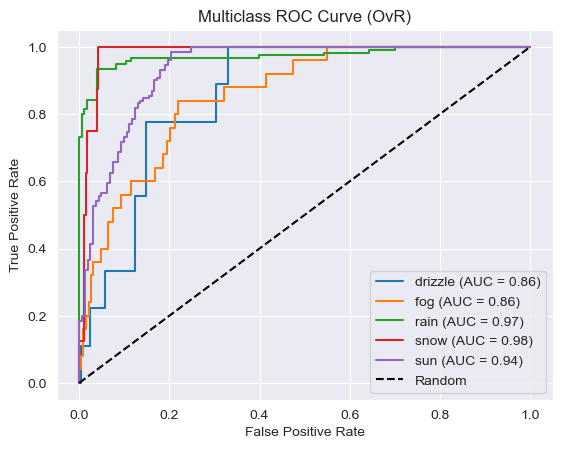

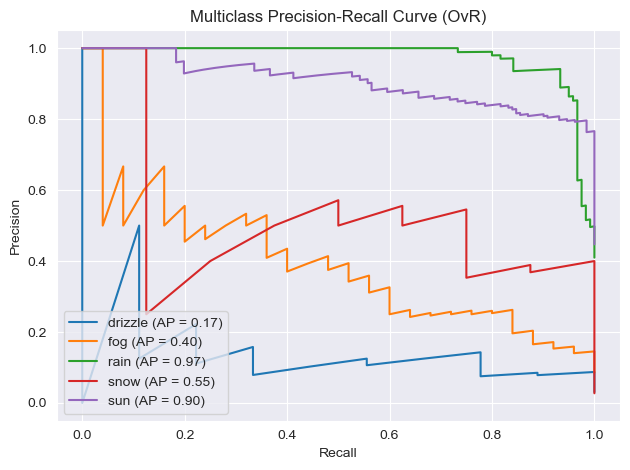

In [112]:
#get unique weather types and separate them into bins
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = len(classes)

#get probability of y
y_score = model.predict_proba(X_test)

#create plots

#create ROC curve
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (OvR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#create Precision-Recall curve
for i in range(len(classes)):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    avg_precision = average_precision_score(y_test_bin[:, i], y_score[:, i])
    plt.plot(recall, precision, label=f'{classes[i]} (AP = {avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multiclass Precision-Recall Curve (OvR)')
plt.legend(loc='lower left')
plt.grid(True)

plt.tight_layout()

#show graphs
plt.show()

The curves show that for predicting rain and sun it does a great job, but for the others it does mediocre at best, and for drizzle it is absolutely awful. However, this can be due to the frequency of the types of weather for seattle. For example if it rains a lot there it would have more training for situation in which it rains or doesn't.

Finally, I make a confusion matrix to show the accuracy of the model.

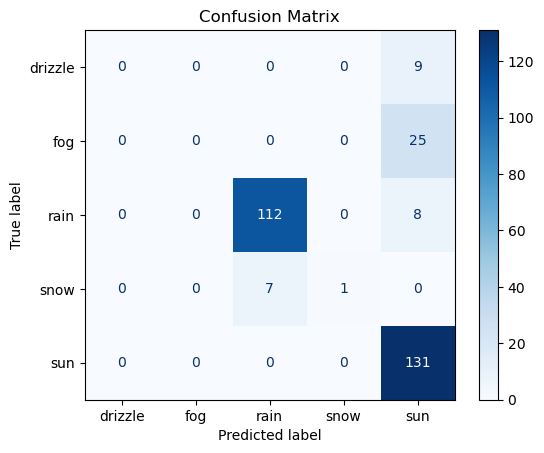

In [5]:
#create confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

#plot and display matrix
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()
